# K最近傍法によるクラス分類

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

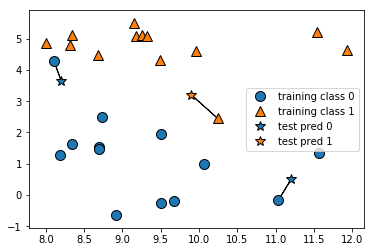

In [2]:
#testデータに最も近い1点のクラスと判定する
mglearn.plots.plot_knn_classification(n_neighbors=1)

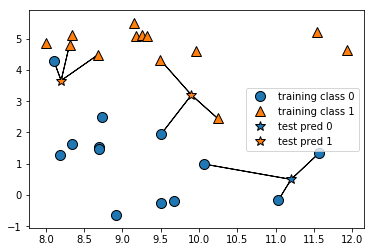

In [3]:
#testデータに最も近い3点の属するクラスと判定する
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
X,y=mglearn.datasets.make_forge()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [6]:
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
clf.score(X_test,y_test)

0.8571428571428571

## n_neighborsを小さくすると複雑度の高いモデルに対応

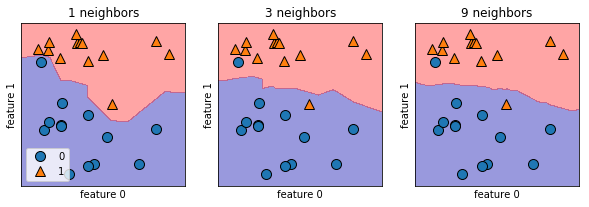

In [9]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

#zip→複数の配列の要素を一度に処理できる
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    #境界値の表示
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    #散布図の表示
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

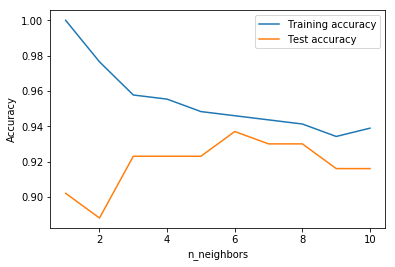

In [10]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

#n_neighborsを1～10まで変化させる
for n_neighbors in neighbors_settings:
    #モデル構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    #訓練データの精度
    training_accuracy.append(clf.score(X_train,y_train))
    #検証データの精度
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="Training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

n_neighborsを大きくするとモデルが単純になりすぎて性能が低下する
n_neighborsを小さくするとモデルが複雑になりすぎて性能が低下する
上図の場合、検証データの精度の最も高いn_neighbors=6が適切といえる

# K-近傍回帰

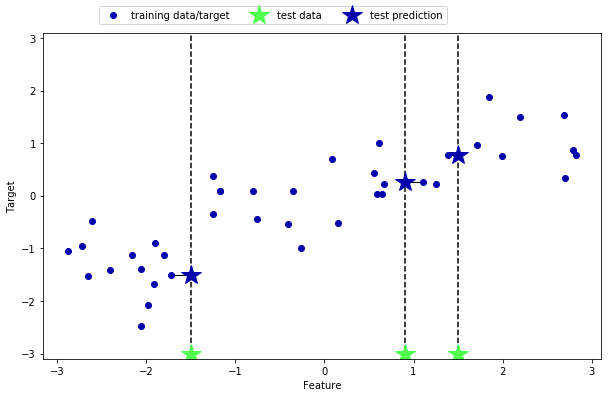

In [11]:
#Featureが決まっているとき最も近い点をTagertの値とする
mglearn.plots.plot_knn_regression(n_neighbors=1)

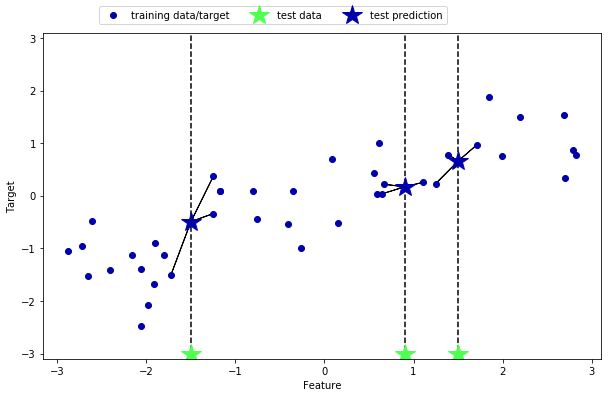

In [12]:
#最も近い3点の平均をTagertの値とする
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

#waveデータ・セットを訓練セットとテストセットに分割
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#3つの最近傍点を考慮するように設定してインスタンスを作成
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [14]:
#検証データによる予測結果の表示
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [15]:
reg.score(X_test,y_test)

0.8344172446249604

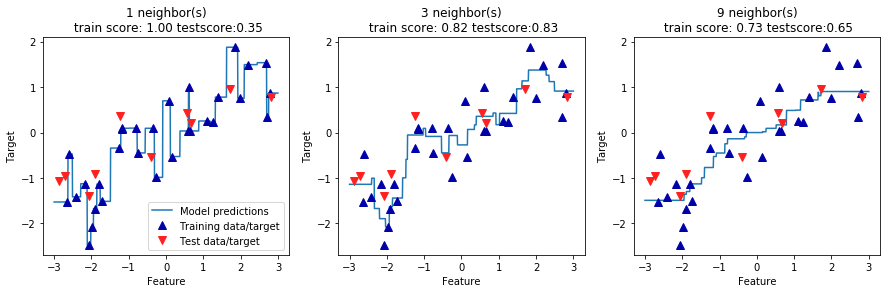

In [17]:
#1次元のデータセットに対して予測値がどうなるかの確認
fig,axes = plt.subplots(1,3,figsize=(15,4))
#-3~3の間に1000個のポイントを作成
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    #1,3,9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} testscore:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")

1最近傍点による回帰では訓練セットに対して過大に適用しすぎている。(現にtrain score は1.0)

逆に9最近傍点による回帰ではモデルが単純になりすぎて精度が落ちている。

3の場合だとtestscore=0.83となりいい塩梅

## 利点と欠点

1. 利点
 1. 理解しやすい
 1. あまり調整しなくてもそれなに高い性能となる
 1. モデル構築が高速
1. 欠点
 1. 訓練セットが大きくなると予測が遅くなる
 1. 多数の特徴量をもつ場合うまくいかない
 1. ほとんどの特徴量が0となる疎なデータセットでは性能が悪い